# Varying the Sum of Neutrino Masses

In [9]:
import crosspower as cp
import FisherCl2 as fcl
from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [10]:
# reload any changes that have been made to crosspower.py
reload(cp)
reload(fcl.cp)
reload(fcl)

<module 'FisherCl2' from 'FisherCl2.pyc'>

# Start with varying the sum of neutrino masses
Want to match Figure 2 from Wu et. al. (2014)

In [11]:
# get some matter power interpolation objects
nh = 'normal'
nmn = 3
mnu0 =   0.0
#mnu1 =  50e-3
#mnu2 = 100e-3
#mnu3 = 150e-3
#labels = ['50 meV','100 meV','150 meV']
mnu1 = 0.1
mnu2 = 0.2
mnu3 = 0.3
labels = ['100 meV','200 meV','300 meV']
nonlinear = True #False # halofit
nz = 1000 # number of points in matterPower arrays

In [12]:
# adjust CDM density to accomodate extra neutrino mass; keep constant Omega_c + Omega_nu for all cases
def omnh2(mnu):
    """
    eqn. 12 from Wu et. al. 2014,
    attributed to Mangano et. al. 2005
    Input: 
        mnu: sum of mass of neutrinos in eV
    Returns:
        Omega_nu*h**2
    """
    return mnu/94

omnh2_1  =  omnh2(mnu1)
omnh2_2  =  omnh2(mnu2)
omnh2_3  =  omnh2(mnu3)
omnh2_06 =  omnh2(0.06) # used by Planck

omch2 = 0.1193 # Planck

# remove correction to dm mass due to neutrinos for simplicity
omch2_0 = omch2+omnh2_06
omch2_1 = omch2+omnh2_06#-omnh2_1
omch2_2 = omch2+omnh2_06#-omnh2_2
omch2_3 = omch2+omnh2_06#-omnh2_3

print omch2_0
print omch2_1
print omch2_2
print omch2_3

0.119938297872
0.119938297872
0.119938297872
0.119938297872


In [13]:
print 'starting myPk0...'
AccuracyBoost = 1#3
#myPk0 = cp.matterPower(neutrino_hierarchy='degenerate',num_massive_neutrinos=0  ,mnu=mnu0,omch2=omch2_0,nz=nz)
myPk0 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=0,  mnu=mnu0,omch2=omch2_0,
                       nonlinear=nonlinear,nz=nz,AccuracyBoost=AccuracyBoost)
print 'starting myPk1...'
myPk1 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=nmn,mnu=mnu1,omch2=omch2_1,
                       nonlinear=nonlinear,nz=nz,AccuracyBoost=AccuracyBoost)
print 'starting myPk2...'
myPk2 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=nmn,mnu=mnu2,omch2=omch2_2,
                       nonlinear=nonlinear,nz=nz,AccuracyBoost=AccuracyBoost)
print 'starting myPk3...'
myPk3 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=nmn,mnu=mnu3,omch2=omch2_3,
                       nonlinear=nonlinear,nz=nz,AccuracyBoost=AccuracyBoost)
print 'done'

starting myPk0...
zs.size:  998


starting myPk1...
zs.size:  998


starting myPk2...
zs.size:  998


starting myPk3...
zs.size:  998
done


In [14]:
# try matter power spectra ratios
kSpectrum = np.logspace(-3.7,1.0,1000)
#print kSpectrum

myZs = np.linspace(0,4,17)
#myZ = 0
Pk0s = []
Pk1s = []
Pk2s = []
Pk3s = []

for myZ in myZs:
    PKinterp0 = myPk0.PK
    PKinterp1 = myPk1.PK
    PKinterp2 = myPk2.PK
    PKinterp3 = myPk3.PK
    Pk0 = PKinterp0.P(myZ,kSpectrum)
    Pk1 = PKinterp1.P(myZ,kSpectrum)
    Pk2 = PKinterp2.P(myZ,kSpectrum)
    Pk3 = PKinterp3.P(myZ,kSpectrum)
    #print 'sizes: ',kSpectrum.size,Pk0.size,Pk1.size,Pk2.size,Pk3.size
    Pk0s.append(Pk0)
    Pk1s.append(Pk1)
    Pk2s.append(Pk2)
    Pk3s.append(Pk3)
print 'done interpolating Pk.s'

done interpolating Pk.s


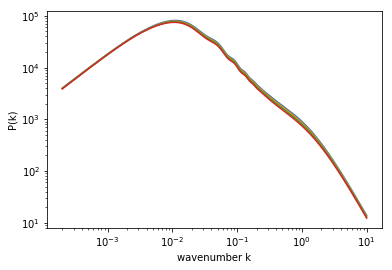

In [15]:
# look at the z=0 one
plt.loglog(kSpectrum,Pk0s[0])
plt.loglog(kSpectrum,Pk1s[0])
plt.loglog(kSpectrum,Pk2s[0])
plt.loglog(kSpectrum,Pk3s[0])
plt.xlabel('wavenumber k')
plt.ylabel('P(k)')
plt.show();

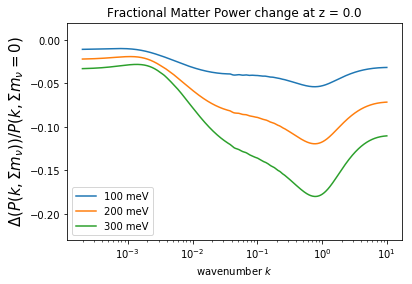

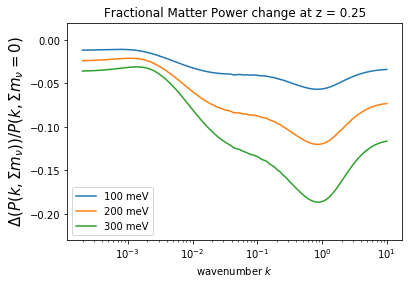

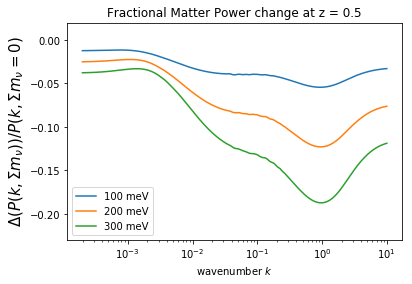

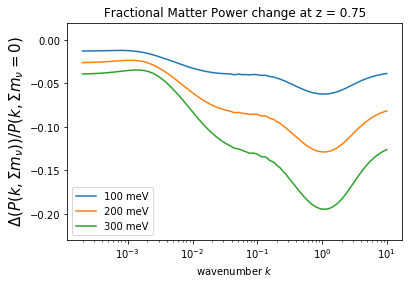

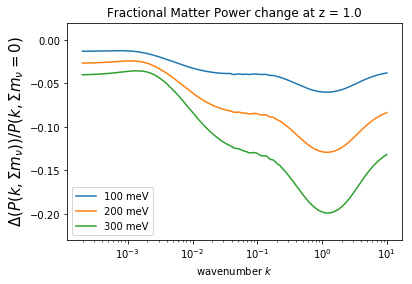

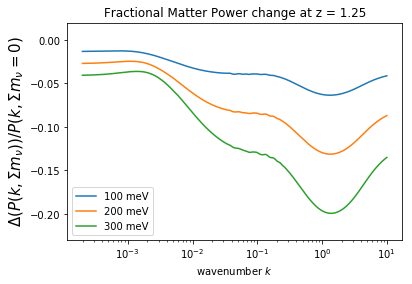

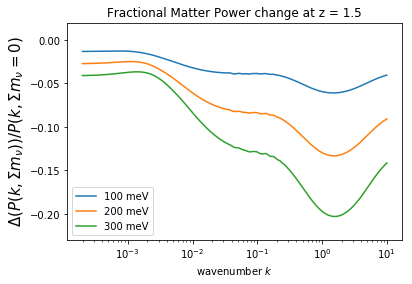

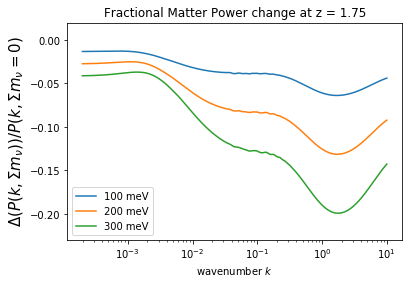

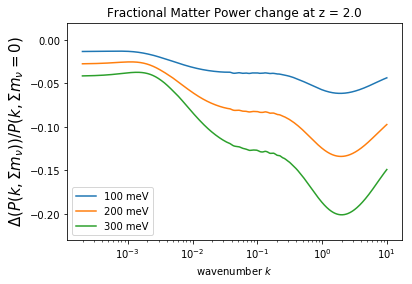

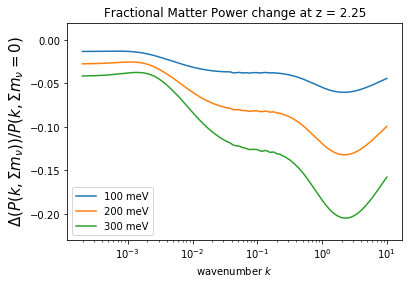

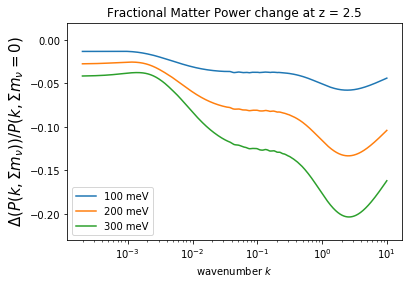

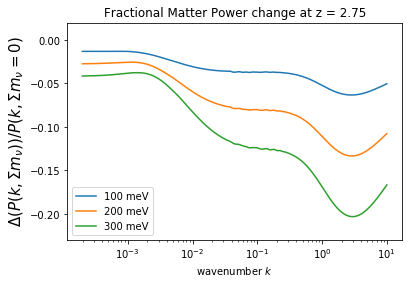

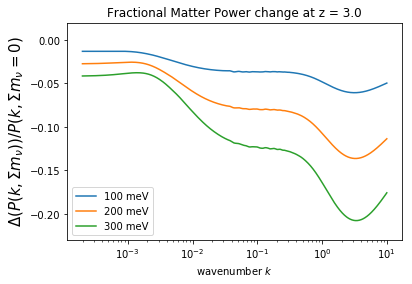

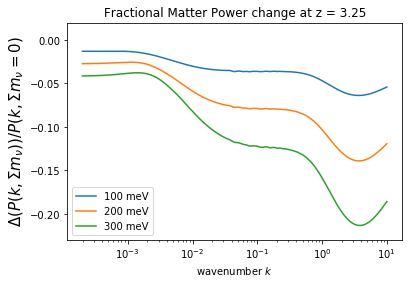

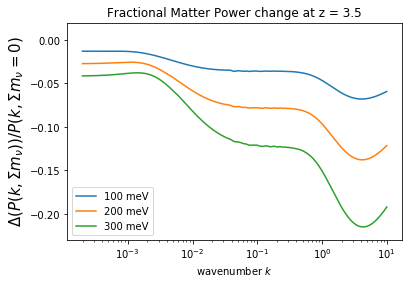

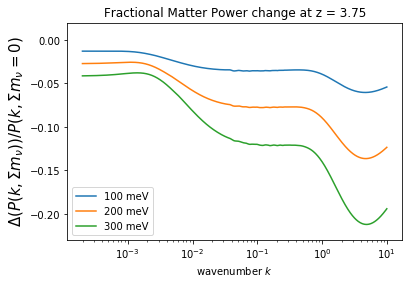

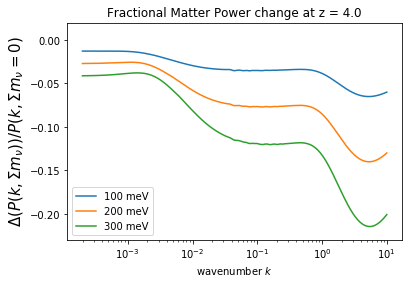

In [16]:
# plot fractional changes

for i,myZ in enumerate(myZs):
    Pks = (Pk1s[i],Pk2s[i],Pk3s[i])
    for pkNum in range(3):
        t = (Pks[pkNum]-Pk0s[i])/Pk0s[i]
        plt.semilogx(kSpectrum,t,label=labels[pkNum])
        plt.ylabel(r'$\Delta(P(k,\Sigma m_\nu))/P(k,\Sigma m_\nu = 0) $',fontsize=15)
        plt.xlabel(r'wavenumber $k$')
        plt.title('Fractional Matter Power change at z = {0}'.format(myZ))
        plt.ylim([-0.23,0.02])
    plt.legend(loc='lower left')
    plt.show();

In this version of the plot, $\theta_A$ is held fixed, not $H_0$.  
This causes an increase in the ratio at all $k$ values compared to the version with $H_0$ fixed, not $\theta_A$.

# Use matter power interpolaters to create angular power spectra

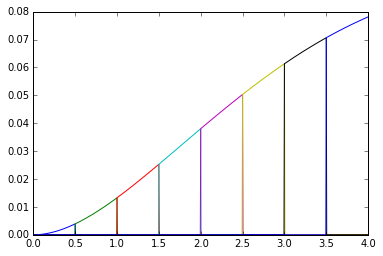

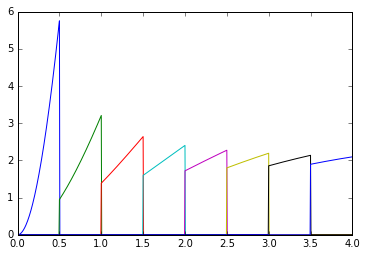

In [60]:
# what redshift bins am I using?
z0 = 3 #1.5
zmax = 4
nBins = 8
cp.plotModelDNDZbins(z0=z0,zmax=zmax,nBins=nBins)
cp.plotModelDNDZbins(z0=z0,zmax=zmax,nBins=nBins,doNorm=True)

In [61]:
# set up to collect power spectra
Cls0=[]
Cls1=[]
Cls2=[]
Cls3=[]

In [62]:
# getCl has default values: epsrel=1.49e-2, epsabs=0
epsrel = 1.49e-8
epsabs = 1.49e-8

In [63]:
# time the output
import time
starttime = time.time()

In [64]:
# these are the kk power spectra
ls0,Cl0kk = cp.getCl(myPk0,epsrel=epsrel,epsabs=epsabs)
ls1,Cl1kk = cp.getCl(myPk1,epsrel=epsrel,epsabs=epsabs)
ls2,Cl2kk = cp.getCl(myPk2,epsrel=epsrel,epsabs=epsabs)
ls3,Cl3kk = cp.getCl(myPk3,epsrel=epsrel,epsabs=epsabs)
Cls0.append(Cl0kk)
Cls1.append(Cl1kk)
Cls2.append(Cl2kk)
Cls3.append(Cl3kk)

window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0


In [65]:
# get kg
# use same parameters as for bins shown above
#zmax=4
#nBins=8
#z0 = 3 #1.5
for binNum in range(1,nBins+1):
    print 'starting bin ',binNum,' of ',nBins
    ls0,Cl0kg = cp.getCl(myPk0,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,binNum2=binNum,dndzMode=2,
                         z0=z0,epsrel=epsrel,epsabs=epsabs)
    ls1,Cl1kg = cp.getCl(myPk1,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,binNum2=binNum,dndzMode=2,
                         z0=z0,epsrel=epsrel,epsabs=epsabs)
    ls2,Cl2kg = cp.getCl(myPk2,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,binNum2=binNum,dndzMode=2,
                         z0=z0,epsrel=epsrel,epsabs=epsabs)
    ls3,Cl3kg = cp.getCl(myPk3,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,binNum2=binNum,dndzMode=2,
                         z0=z0,epsrel=epsrel,epsabs=epsabs)
    Cls0.append(Cl0kg)
    Cls1.append(Cl1kg)
    Cls2.append(Cl2kg)
    Cls3.append(Cl3kg)

starting bin  1  of  8
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
window  1 : kappa  0
window  2 : galaxies  1
starting bin  2  of  8
window  1 : kappa  0
window  2 : galaxies  2
window  1 : kappa  0
window  2 : galaxies  2
window  1 : kappa  0
window  2 : galaxies  2
window  1 : kappa  0
window  2 : galaxies  2
starting bin  3  of  8
window  1 : kappa  0
window  2 : galaxies  3
window  1 : kappa  0
window  2 : galaxies  3
window  1 : kappa  0
window  2 : galaxies  3
window  1 : kappa  0
window  2 : galaxies  3
starting bin  4  of  8
window  1 : kappa  0
window  2 : galaxies  4
window  1 : kappa  0
window  2 : galaxies  4
window  1 : kappa  0
window  2 : galaxies  4
window  1 : kappa  0
window  2 : galaxies  4
starting bin  5  of  8
window  1 : kappa  0
window  2 : galaxies  5
window  1 : kappa  0
window  2 : galaxies  5
window  1 : kappa  0
window  2 : galaxies  5
window  1 : kappa  0
window  2

In [66]:
# get gg
zmax=4
nBins=8
for binNum in range(1,nBins+1):
    print 'starting bin ',binNum,' of ',nBins
    ls0,Cl0gg = cp.getCl(myPk0,winfunc1=cp.winGalaxies,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,
                         binNum1=binNum,binNum2=binNum,dndzMode=2,z0=z0,epsrel=epsrel,epsabs=epsabs)
    ls1,Cl1gg = cp.getCl(myPk1,winfunc1=cp.winGalaxies,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,
                         binNum1=binNum,binNum2=binNum,dndzMode=2,z0=z0,epsrel=epsrel,epsabs=epsabs)
    ls2,Cl2gg = cp.getCl(myPk2,winfunc1=cp.winGalaxies,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,
                         binNum1=binNum,binNum2=binNum,dndzMode=2,z0=z0,epsrel=epsrel,epsabs=epsabs)
    ls3,Cl3gg = cp.getCl(myPk3,winfunc1=cp.winGalaxies,winfunc2=cp.winGalaxies,zmax=zmax,nBins=nBins,
                         binNum1=binNum,binNum2=binNum,dndzMode=2,z0=z0,epsrel=epsrel,epsabs=epsabs)
    Cls0.append(Cl0gg)
    Cls1.append(Cl1gg)
    Cls2.append(Cl2gg)
    Cls3.append(Cl3gg)

starting bin  1  of  8
window  1 : galaxies  1
window  2 : galaxies  1
window  1 : galaxies  1
window  2 : galaxies  1
window  1 : galaxies  1
window  2 : galaxies  1
window  1 : galaxies  1
window  2 : galaxies  1
starting bin  2  of  8
window  1 : galaxies  2
window  2 : galaxies  2
window  1 : galaxies  2
window  2 : galaxies  2
window  1 : galaxies  2
window  2 : galaxies  2
window  1 : galaxies  2
window  2 : galaxies  2
starting bin  3  of  8
window  1 : galaxies  3
window  2 : galaxies  3
window  1 : galaxies  3
window  2 : galaxies  3
window  1 : galaxies  3
window  2 : galaxies  3
window  1 : galaxies  3
window  2 : galaxies  3
starting bin  4  of  8
window  1 : galaxies  4
window  2 : galaxies  4
window  1 : galaxies  4
window  2 : galaxies  4
window  1 : galaxies  4
window  2 : galaxies  4
window  1 : galaxies  4
window  2 : galaxies  4
starting bin  5  of  8
window  1 : galaxies  5
window  2 : galaxies  5
window  1 : galaxies  5
window  2 : galaxies  5
window  1 : galaxies 

In [67]:
endtime = time.time()
print 'done making Cls'
print 'time elapsed: ',endtime-starttime,' seconds'
print 'time elapsed: ',(endtime-starttime)/60,' minutes'
print 'time elapsed: ',(endtime-starttime)/3600,' hours'

print Cls0.__len__()
print Cls0[0].shape

done making Cls
time elapsed:  114313.535575  seconds
time elapsed:  1905.22559292  minutes
time elapsed:  31.7537598819  hours
17
(2499,)


In [68]:
print 1665.7/60.
print 1890.4/60.

27.7616666667
31.5066666667


In [69]:
# save it

import pickle
Cl_dict = {'Cls0':Cls0,'Cls1':Cls1,'Cls2':Cls2,'Cls3':Cls3}

#filehandler = open('Cl_kk_kg_gg_linear_b.pkl','w') # no nonlinear, AccuracyBoost = 3
#filehandler = open('Cl_kk_kg_gg_linear_c.pkl','w') # yes nonlinear, AccuracyBoost = 3

pickle.dump(Cl_dict,filehandler)
filehandler.close()
print 'done'


done


In [141]:
# or load it

import pickle
#Cl_dict = pickle.load(open('Cl_kk_kg_gg_linear.pkl','r'))
Cl_dict = pickle.load(open('Cl_kk_kg_gg_linear_b_Gwy.pkl','r'))

Cls0 = Cl_dict['Cls0'] 
Cls1 = Cl_dict['Cls1'] 
Cls2 = Cl_dict['Cls2'] 
Cls3 = Cl_dict['Cls3'] 


# make some plots

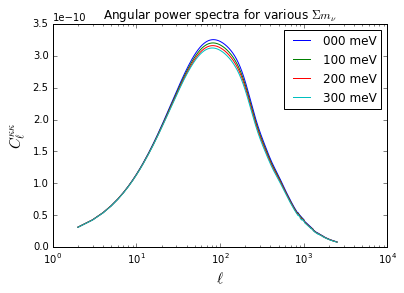

In [142]:
# plot kk power spectra
#%matplotlib notebook
%matplotlib inline
Cls = [Cls1,Cls2,Cls3]
plt.semilogx(ls0,Cls0[0],label='000 meV')
for massNum in range(3):
    plt.semilogx(ls0,Cls[massNum][0],label=labels[massNum])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel(r'$C_\ell^{\kappa\kappa}$',fontsize=15)
plt.title(r'Angular power spectra for various $\Sigma m_\nu$')
plt.legend()
plt.show()

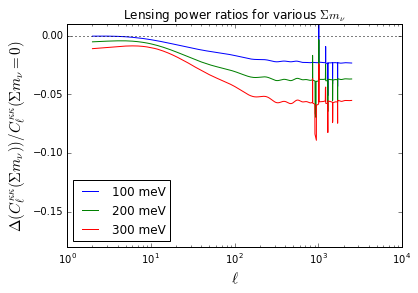

In [143]:
# plot Delta Cl / Cl
for massNum in range(3):
    plt.semilogx(ls0,(Cls[massNum][0]-Cls0[0])/Cls0[0],label=labels[massNum])
plt.axhline(y=0,linestyle=':',color='k')
plt.legend(loc='lower left')
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel(r'$\Delta(C_\ell^{\kappa\kappa}(\Sigma m_\nu))/C_\ell^{\kappa\kappa} (\Sigma m_\nu = 0) $',fontsize=15)
plt.title(r'Lensing power ratios for various $\Sigma m_\nu$')
plt.ylim([-0.18,0.01])
plt.show();

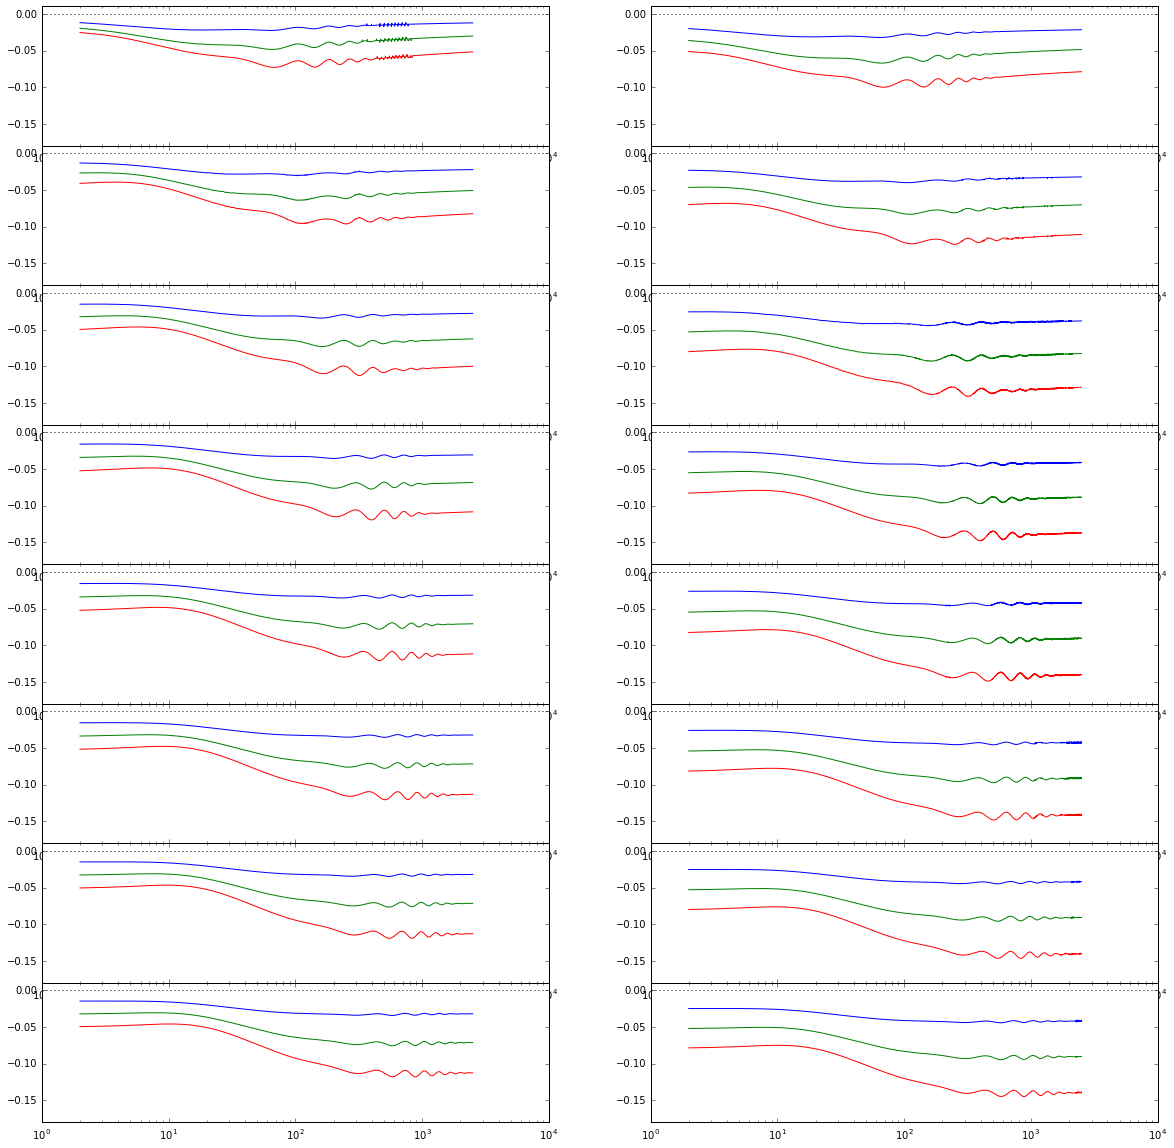

In [144]:
# plot the kg and gg power spectra
#%matplotlib notebook
#doRatios = False
doRatios = True
f, axarr = plt.subplots(nBins,2,figsize=(20,20))
for binNum in range(1,nBins+1):
    plt.sca(axarr[binNum-1,0])
    if not doRatios:
        plt.semilogx(ls0,Cls0[binNum],label='0 meV')
    for massNum in range(3):
        if doRatios:
            plt.semilogx(ls0,(Cls[massNum][binNum]-Cls0[binNum])/Cls0[binNum],label=labels[massNum])
            plt.ylim([-0.18,0.01])
        else:
            plt.semilogx(ls0,Cls[massNum][binNum],label=labels[massNum])
            plt.ylim([0,12.5e-7])
    plt.axhline(y=0,linestyle=':',color='k')
    plt.sca(axarr[binNum-1,1])
    for massNum in range(3):
        if doRatios:
            plt.semilogx(ls0,(Cls[massNum][binNum+nBins]-Cls0[binNum+nBins])/Cls0[binNum+nBins],label=labels[massNum])
            plt.ylim([-0.18,0.01])
        else:
            plt.semilogx(ls0,Cls[massNum][binNum+nBins],label=labels[massNum])
            plt.ylim([0,12.5e-7])
    plt.axhline(y=0,linestyle=':',color='k')
f.subplots_adjust(hspace=0)
#f.subplots_adjust(wspace=0)
plt.show();
#%matplotlib inline

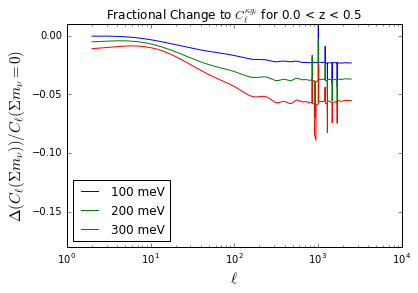

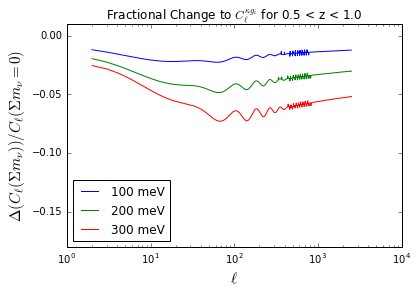

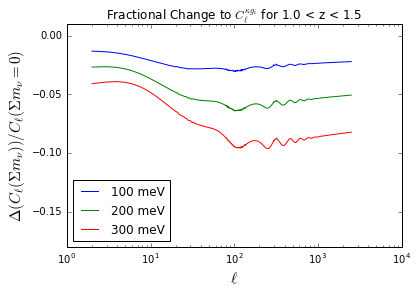

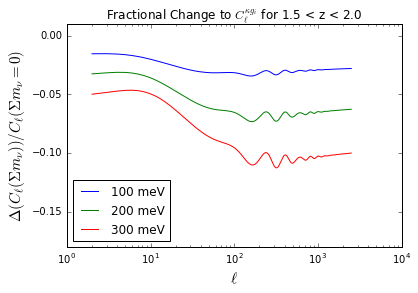

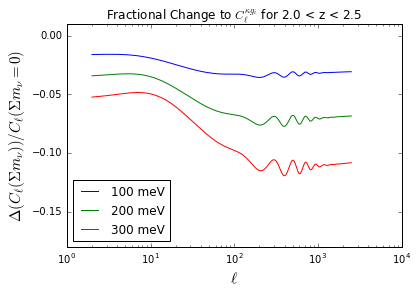

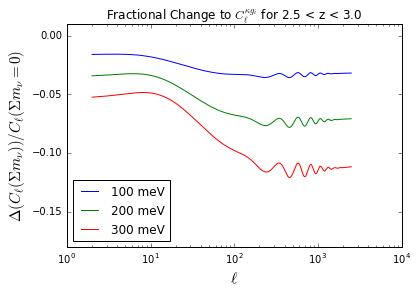

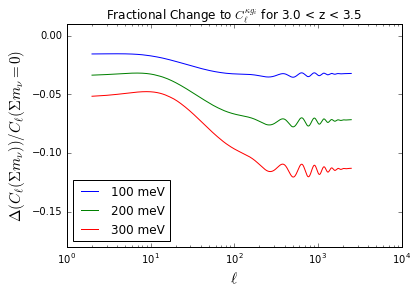

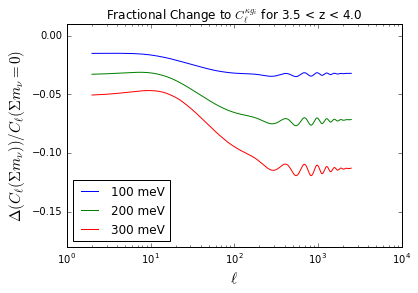

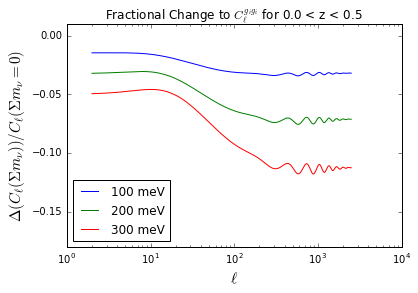

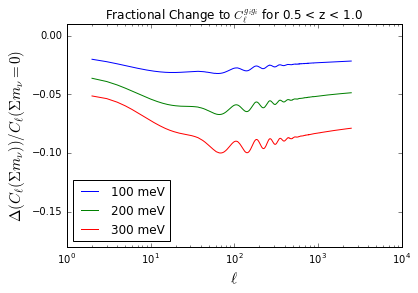

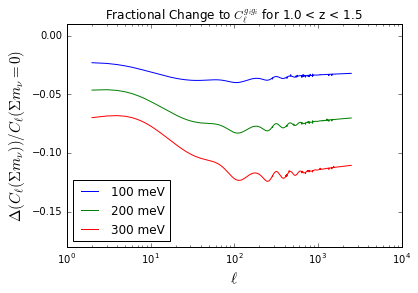

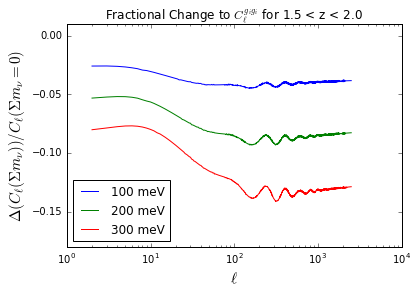

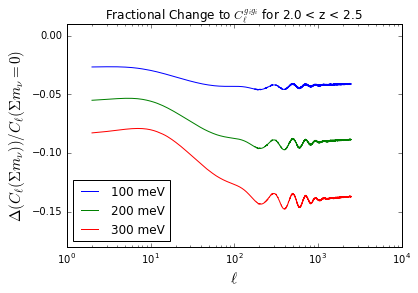

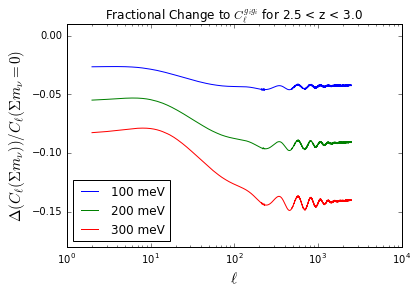

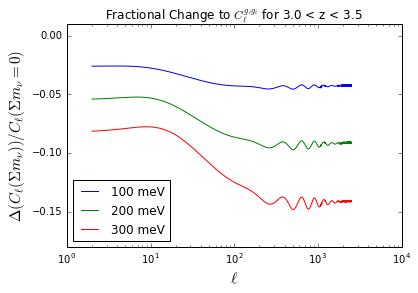

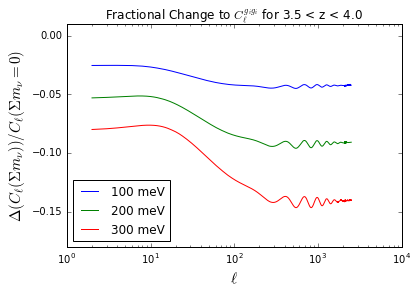

In [145]:
# plot them individually
%matplotlib inline

# kappa g
for binNum in range(nBins):
    
    for massNum in range(3):
        #print massNum,binNum
        plt.semilogx(ls0,(Cls[massNum][binNum]-Cls0[binNum])/Cls0[binNum],label=labels[massNum])
        plt.ylim([-0.18,0.01])
    plt.ylabel(r'$\Delta(C_\ell(\Sigma m_\nu))/C_\ell(\Sigma m_\nu = 0) $',fontsize=15)
    plt.xlabel(r'$\ell$',fontsize=15)
    zmin = str(binEdges[binNum])
    zmax = str(binEdges[binNum+1])
    plt.title(r'Fractional Change to $C_\ell^{\kappa g_i}$ for '+zmin+' < z < '+zmax)
    plt.legend(loc='lower left')
    plt.show();
    
# g g
for binNum in range(nBins):
    
    for massNum in range(3):
        #print massNum,binNum
        plt.semilogx(ls0,(Cls[massNum][binNum+nBins]-Cls0[binNum+nBins])/Cls0[binNum+nBins],label=labels[massNum])
        plt.ylim([-0.18,0.01])
    plt.ylabel(r'$\Delta(C_\ell(\Sigma m_\nu))/C_\ell(\Sigma m_\nu = 0) $',fontsize=15)
    plt.xlabel(r'$\ell$',fontsize=15)
    zmin = str(binEdges[binNum])
    zmax = str(binEdges[binNum+1])
    plt.title(r'Fractional Change to $C_\ell^{g_i g_i}$ for '+zmin+' < z < '+zmax)
    plt.legend(loc='lower left')
    plt.show();

The lines are unexpectedly crossing each other.  Why?

# Check P(z,k) interpolator values

In [105]:
# check CAMB parameters
pars = myPk1.getPars() # the one with smallest nonzero neutrino mass
#pars.set_matter_power(k_per_logint = 10)
#help(pars)
#print pars
print pars.omegab,pars.omegac,pars.omegan
print mnu1/94/(pars.H0/100)**2

0.0496192312134 0.267351578323 0.0023967912489
0.00237135742069


zmax:  1020.29415886


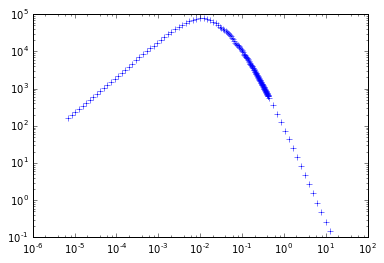

In [106]:
# check z,k values of Pk interpolator
import camb
myVar = camb.model.Transfer_tot
k_per_logint = None
nonlinear = False
zmax = myPk0.zs[-1]
print 'zmax: ',zmax 
Pk, z, k = camb.get_matter_power_interpolator(pars,nonlinear=nonlinear,hubble_units=False,k_hunit=False,
                                              kmax=10,k_per_logint=k_per_logint,var1=myVar,var2=myVar,
                                              zmax=zmax,return_z_k=True)
PofK = Pk.P(0,k)
plt.loglog(k,PofK,'b+')
plt.show();

In [107]:
results = camb.get_background(pars)
#help(results)
H0=results.h_of_z(0)
print H0*2.997e5

66.9600350094


# Check H(z) and its approximation

In [108]:
# extract zs, dzs, dchis, H0, and Hs from each matterPower object
zs0 = myPk0.zs
zs1 = myPk1.zs
zs2 = myPk2.zs
zs3 = myPk3.zs
dzs0 = myPk0.dzs
dzs1 = myPk1.dzs
dzs2 = myPk2.dzs
dzs3 = myPk3.dzs
dchis0 = myPk0.dchis
dchis1 = myPk1.dchis
dchis2 = myPk2.dchis
dchis3 = myPk3.dchis
H00 = myPk0.H0
H01 = myPk1.H0
H02 = myPk2.H0
H03 = myPk3.H0
Hs0 = myPk0.Hs
Hs1 = myPk1.Hs
Hs2 = myPk2.Hs
Hs3 = myPk3.Hs
print 'H_0: ',np.array((H00,H01,H02,H03))*2.997e5

# add in 0, H_0
zs0 = np.hstack(([0],zs0))
zs1 = np.hstack(([0],zs1))
zs2 = np.hstack(([0],zs2))
zs3 = np.hstack(([0],zs3))
Hs0 = np.hstack(([H00],Hs0))
Hs1 = np.hstack(([H01],Hs1))
Hs2 = np.hstack(([H02],Hs2))
Hs3 = np.hstack(([H03],Hs3))

H_0:  [ 67.75739267  66.96003494  66.06570913  65.17792983]


In [109]:
# get interpolators
from scipy.interpolate import interp1d
Hz0 = interp1d(zs0,Hs0)
Hz1 = interp1d(zs1,Hs1)
Hz2 = interp1d(zs2,Hs2)
Hz3 = interp1d(zs3,Hs3)

In [110]:
myZs = np.linspace(0,5,1000)
myHs0 = Hz0(myZs)
myHs1 = Hz1(myZs)
myHs2 = Hz2(myZs)
myHs3 = Hz3(myZs)

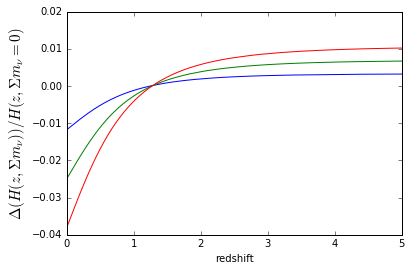

In [111]:
plt.plot(myZs,(myHs1-myHs0)/myHs0)
plt.plot(myZs,(myHs2-myHs0)/myHs0)
plt.plot(myZs,(myHs3-myHs0)/myHs0)
plt.ylabel(r'$\Delta(H(z,\Sigma m_\nu))/H(z,\Sigma m_\nu = 0) $',fontsize=15)
plt.xlabel('redshift')

The value of $H_0$ and $\Sigma m_\nu$ appear negatively correlated, as expected.

# Next do $\chi(z)$

/sw/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide
/sw/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide
/sw/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in divide


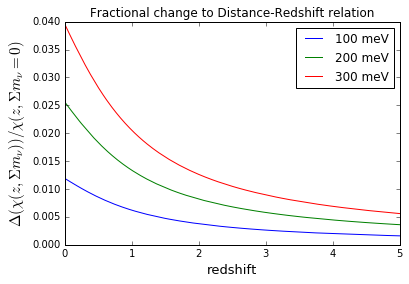

In [112]:
# next do chi(z)
chis0 = myPk0.chis
chis1 = myPk1.chis
chis2 = myPk2.chis
chis3 = myPk3.chis

# could put in chistar, zstar, but didn't
chis0 = np.hstack(([0],chis0))
chis1 = np.hstack(([0],chis1))
chis2 = np.hstack(([0],chis2))
chis3 = np.hstack(([0],chis3))

chi0 = interp1d(zs0,chis0)
chi1 = interp1d(zs1,chis1)
chi2 = interp1d(zs2,chis2)
chi3 = interp1d(zs3,chis3)

myChis0 = chi0(myZs)
myChis1 = chi1(myZs)
myChis2 = chi2(myZs)
myChis3 = chi3(myZs)

plt.plot(myZs,(myChis1-myChis0)/myChis0,label=labels[0])
plt.plot(myZs,(myChis2-myChis0)/myChis0,label=labels[1])
plt.plot(myZs,(myChis3-myChis0)/myChis0,label=labels[2])
plt.ylabel(r'$\Delta(\chi(z,\Sigma m_\nu))/\chi(z,\Sigma m_\nu = 0) $',fontsize=15)
plt.title('Fractional change to Distance-Redshift relation')
plt.xlabel('redshift',fontsize=13)
plt.legend(loc='upper right');

The higher $\Sigma m_\nu$ values have higher $\chi(z)$ for all $z$, as expected from 
$\chi(z) = c \int_z^0 \frac{- dz\prime}{H(z\prime)}$ relation.

Also, higher $\Sigma m_\nu$ values asymptote towards higher values, due to faster late-time expansion.

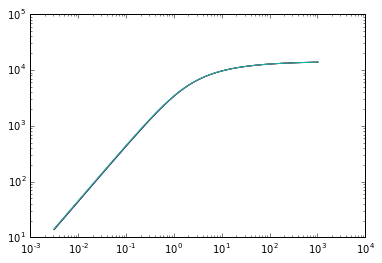

In [113]:
plt.loglog(zs0,chis0)
plt.loglog(zs1,chis1)
plt.loglog(zs2,chis2)
plt.loglog(zs3,chis3);

# Try a simpler integral:
#    $C_\ell = \int_{\chi(z_{min})}^{\chi(z_{max})} P\left(k=\frac{\ell+0.5}{\chi},z(\chi)\right) d\chi $

In [114]:
# simplified version of angular power spectrum code in crosspower.getCl()
def getSimpleClOld(myPk,lmax=2500,zmin=0,zmax=1100):
    """
      inputs:
        myPk: a matterPower object
        lmax: maximum ell to be calculated and returned
        zmin,zmax: minimum,maximum of integration range for dchi(z)
      returns:
        ls: ell values
        cl: function evaluated at those values
    """
    PK,chistar,chis,dchis,zs,dzs,pars = myPk.getPKinterp()
    ls = np.arange(2,lmax+1, dtype=np.float64)
    cl = np.zeros(ls.shape)
    w = np.ones(chis.shape) #to zero integrand outside k,z ranges
    for i,l in enumerate(ls):
        k=(l+0.5)/chis  # k(l,chi)
        w[k<1e-4]=0
        w[k>=myPk.kmax]=0
        w[zs<zmin]=0
        w[zs>zmax]=0
        cl[i] = np.dot( dchis, w*PK.P(zs,k,grid=False) )
        # rewrite this using the quad function
        
    return ls, cl


In [115]:
# simplified version of angular power spectrum code in crosspower.getCl()
#   ok... it's actulally much less simple now that I am refactoring it to use quad
from scipy.integrate import quad

def getChiofZ(myPk):
    """
      get a chi(z) interpolator
      inputs:
        myPk: a matterPower object
    """
    zs = myPk.zs
    chis = myPk.chis
    zstar = myPk.zstar
    chistar = myPk.chistar
    zs = np.hstack(([0],zs,zstar))
    chis = np.hstack(([0],chis,chistar))
    return interp1d(zs,chis)
    
def gsCl_integrand(myPk,zmin=0,zmax=1100):
    """
      the integrand for the getSimpleCl integral
      inputs:
        myPk: a matterPower object
        zmin,zmax: minimum,maximum of integration range for dchi(z)
      returns:
        a function of redshift z, frequency ell: f(z,l)
        will evaluate to zero outside of zmin,zmax range
        also zero outside of k(chi(z)) kmin,kmax range
    """
    PK,chistar,chis,dchis,zs,dzs,pars = myPk.getPKinterp()
    #chiOfZ = getChiofZ(myPk)
    chiOfZ = myPk.getChiofZ()
    myK = lambda z,ell: (ell+0.5)/chiOfZ(z)
    def wOfKZ(z,k,zmin,zmax,kmin=1e-4,kmax=myPk.kmax):
        if k < kmin:  return 0
        if k >= kmax: return 0
        if z < zmin:  return 0
        if z > zmax:  return 0
        return 1
    
    return lambda z,ell: wOfKZ(z,myK(z,ell),zmin,zmax) * PK.P(z,myK(z,ell)) #,grid=False)
    

def getSimpleCl(myPk,lmax=2500,zmin=0,zmax=1100,epsrel=1.49e-8,epsabs=1.49e-8):
    """
      inputs:
        myPk: a matterPower object
        lmax: maximum ell to be calculated and returned
        zmin,zmax: minimum,maximum of integration range for dchi(z)
        epsrel,epsabs: relative and absolute error margins to pass to quad
          whichever one is attained first ends the integration
      returns:
        ls: ell values
        cl: function evaluated at those values
    """
    #zstar = myPk.zstar
    #print 'zstar = ',zstar
    print 'zmin = ',zmin,', zmax = ',zmax
    ls  = np.arange(2,lmax+1, dtype=np.float64)
    cl  = np.zeros(ls.shape)
    err = np.zeros(ls.shape)
    integrandOfZL = gsCl_integrand(myPk,zmin=zmin,zmax=zmax)
    
    #nzs = 1000
    #zs = np.linspace(zmin,zmax,nzs)
    #dzs = np.ones(nzs-1)*(zmax-zmin)/(nzs-1)
    
    for i,ell in enumerate(ls):
        #integrandOfZ = lambda z: integrandOfZL(z,ell)
        #print 'ell = ',ell,'integrand(z=0.25,ell) = ',integrandOfZ(0.25)
        #cl[i],err[i] = quad(integrandOfZ,0,zstar)
        cl[i],err[i] = quad(integrandOfZL,zmin,zmax,ell,epsabs=epsabs,epsrel=epsrel)
        
        #print 'starting ell = ',ell
        #igs = [integrandOfZL(zs[j],ell) for j in range(nzs)]
        #print '  igs = ',igs
        #cl[i] = np.dot(dzs,igs[:-1]) #integrandOfZL(zs[:-1],ell))
        
    #return ls, cl
    return ls, cl, err  #do I need err?
    

In [116]:
# test getChiofZ, k(z,l)
chiOfZ = getChiofZ(myPk0)
print 'chi(1): ',chiOfZ(1)
myK = lambda z,ell: (ell+0.5)/chiOfZ(z)
print 'k(1,1): ',myK(1,1)
print 'k(1,[1,2,3,4]): ',myK(1,np.array([1,2,3,4]))

# test integrand
t = gsCl_integrand(myPk0,zmin=1,zmax=2)
print t(1.5,10)
print t(1.5,100)
print t(1.5,1000)
print t(0.5,10)

chi(1):  3392.70105008
k(1,1):  0.000442125603717
k(1,[1,2,3,4]):  [ 0.00044213  0.00073688  0.00103163  0.00132638]
9355.18274519
14912.1325336
747.306925821
0.0


In [117]:
# test the wOfKZ window function
kmax = myPk0.kmax
def wOfKZ(z,k,zmin,zmax,kmin=1e-4,kmax=kmax):
        if k < kmin:  return 0
        if k >= kmax: return 0
        if z < zmin:  return 0
        if z > zmax:  return 0
        return 1

In [118]:
print wOfKZ(1,5,0,10)
print wOfKZ(1,5,5,10)
print wOfKZ(1,1e-5,0,10)
print wOfKZ(1,20,0,10)
print wOfKZ(1,1,0,10)



1
0
0
0
1


In [119]:
# time the output
import time

# get redshift ranges
zmin = 0
zmax = 4
nBins = 8
binEdges = np.linspace(zmin,zmax,nBins+1)
print binEdges

# set up to collect power spectra
ClsS0=[]
ClsS1=[]
ClsS2=[]
ClsS3=[]
errS0=[]
errS1=[]
errS2=[]
errS3=[]
times=[]

# set precision
epsabs = 0
epsrel = 1.49e-2

starttime= time.time()
for binNum in range(nBins):
    print 'starting bin ',binNum+1,' of ',nBins
    
    print 'starting mnu 0..'
    ls0,ClS0,err0 = getSimpleCl(myPk0,zmin=binEdges[binNum],zmax=binEdges[binNum+1],epsabs=epsabs,epsrel=epsrel)
    endtime=time.time()
    times.append(endtime-starttime)
    
    print 'starting mnu 1..'
    ls1,ClS1,err1 = getSimpleCl(myPk1,zmin=binEdges[binNum],zmax=binEdges[binNum+1],epsabs=epsabs,epsrel=epsrel)
    endtime=time.time()
    times.append(endtime-starttime)
    
    print 'starting mnu 2..'
    ls2,ClS2,err2 = getSimpleCl(myPk2,zmin=binEdges[binNum],zmax=binEdges[binNum+1],epsabs=epsabs,epsrel=epsrel)
    endtime=time.time()
    times.append(endtime-starttime)
    
    print 'starting mnu 3..'
    ls3,ClS3,err3 = getSimpleCl(myPk3,zmin=binEdges[binNum],zmax=binEdges[binNum+1],epsabs=epsabs,epsrel=epsrel)
    endtime=time.time()
    times.append(endtime-starttime)
    
    ClsS0.append(ClS0)
    ClsS1.append(ClS1)
    ClsS2.append(ClS2)
    ClsS3.append(ClS3)
    errS0.append(err0)
    errS1.append(err1)
    errS2.append(err2)
    errS3.append(err3)
    
print 'done making Cls'
print 'time elapsed: ',times[-1],' seconds'

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4. ]
starting bin  1  of  8
starting mnu 0..
zmin =  0.0 , zmax =  0.5
starting mnu 1..
zmin =  0.0 , zmax =  0.5
starting mnu 2..
zmin =  0.0 , zmax =  0.5
starting mnu 3..
zmin =  0.0 , zmax =  0.5
starting bin  2  of  8
starting mnu 0..
zmin =  0.5 , zmax =  1.0
starting mnu 1..
zmin =  0.5 , zmax =  1.0
starting mnu 2..
zmin =  0.5 , zmax =  1.0
starting mnu 3..
zmin =  0.5 , zmax =  1.0
starting bin  3  of  8
starting mnu 0..
zmin =  1.0 , zmax =  1.5
starting mnu 1..
zmin =  1.0 , zmax =  1.5
starting mnu 2..
zmin =  1.0 , zmax =  1.5
starting mnu 3..
zmin =  1.0 , zmax =  1.5
starting bin  4  of  8
starting mnu 0..
zmin =  1.5 , zmax =  2.0
starting mnu 1..
zmin =  1.5 , zmax =  2.0
starting mnu 2..
zmin =  1.5 , zmax =  2.0
starting mnu 3..
zmin =  1.5 , zmax =  2.0
starting bin  5  of  8
starting mnu 0..
zmin =  2.0 , zmax =  2.5
starting mnu 1..
zmin =  2.0 , zmax =  2.5
starting mnu 2..
zmin =  2.0 , zmax =  2.5
starting mnu 3..
zmin

In [120]:
print ClsS1.__len__()
print ClsS1[0].__len__()

8
2499


In [121]:
print 'time to do 1 bin for 4 mnu values: 33.9 seconds. (bin8) (precision 1.49e-2)'
print 'time to do 1 bin for 4 mnu values: 35.5 seconds. (bin8) (precision 1.49e-4)'
print 'time to do 1 bin for 4 mnu values: 47.9 seconds. (bin8) (precision 1.49e-6)'
print 'time to do 1 bin for 4 mnu values: ',2434/60.,'minutes. (bin8) (precisoin 1.49e-8)'
print 'time to do 1 bin for 4 mnu values: ',2998/60.,'minutes. (bin1)'
print 'to do 8 bins: ',2998/60.*8/60.,'hours.'


time to do 1 bin for 4 mnu values: 33.9 seconds. (bin8) (precision 1.49e-2)
time to do 1 bin for 4 mnu values: 35.5 seconds. (bin8) (precision 1.49e-4)
time to do 1 bin for 4 mnu values: 47.9 seconds. (bin8) (precision 1.49e-6)
time to do 1 bin for 4 mnu values:  40.5666666667 minutes. (bin8) (precisoin 1.49e-8)
time to do 1 bin for 4 mnu values:  49.9666666667 minutes. (bin1)
to do 8 bins:  6.66222222222 hours.


In [122]:
# time to evaluate one getSimpleCl call with zmin=0,zmax=0.5
myMinutes = 813.17/60.
print 'time = ',myMinutes,' minutes with default quad precision: epsabs=1.49e-8, epsrel=1.49e-8.'

print 'time = ',92.3/60,' minutes with quad precision epsabs=0, epsrel=1e-4.'
print 'time = ',304.9/60,' minutes with quad precision epsabs=1e-4, epsrel=0.'

print 'to do a set of 8: ',myMinutes*8/60.,' hours.'
print 'For one Fisher matrix calculation, I have... lots of power spectra to calculate'
print 'for 8 bins: nMaps = 9, there will be 1+8+8 = 17 (nonzero) observable power spectra'
print 'there will be two more for each of 7 cosmic parameters for numeric differentiation'
print 'total: 17+14 = 31.  And more for the b_i derivatives...'

time =  13.5528333333  minutes with default quad precision: epsabs=1.49e-8, epsrel=1.49e-8.
time =  1.53833333333  minutes with quad precision epsabs=0, epsrel=1e-4.
time =  5.08166666667  minutes with quad precision epsabs=1e-4, epsrel=0.
to do a set of 8:  1.80704444444  hours.
For one Fisher matrix calculation, I have... lots of power spectra to calculate
for 8 bins: nMaps = 9, there will be 1+8+8 = 17 (nonzero) observable power spectra
there will be two more for each of 7 cosmic parameters for numeric differentiation
total: 17+14 = 31.  And more for the b_i derivatives...


In [123]:
print 'what is the default precision of quad?'
print 'from the def: def quad(... epsabs=1.49e-8, epsrel=1.49e-8, ...):'

what is the default precision of quad?
from the def: def quad(... epsabs=1.49e-8, epsrel=1.49e-8, ...):


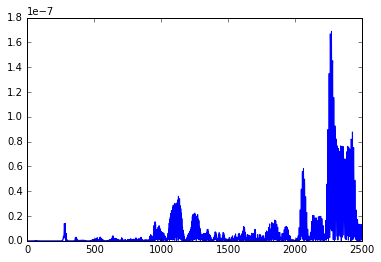

In [124]:
#err0epsabs_1em4 = err0
#err0epsrel_1em4 = err0
plt.plot(ls0,err0/ClS0)

[ 17383.25393215  20002.48776293  21773.55003482 ...,     74.93142463
     74.88468994     74.83799652]


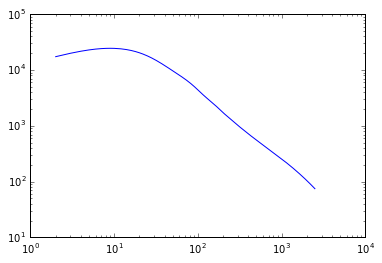

In [125]:
mnuNum = 0
print ClsS0[mnuNum]
plt.loglog(ls0,ClsS0[mnuNum])

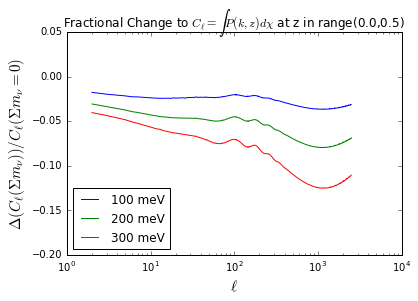

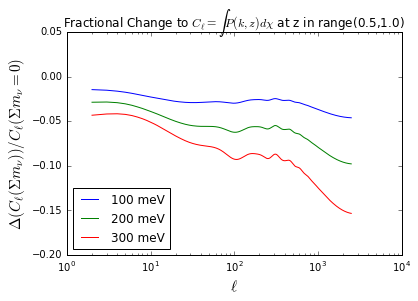

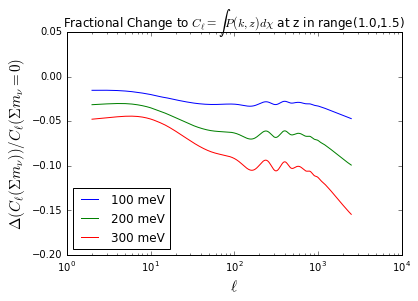

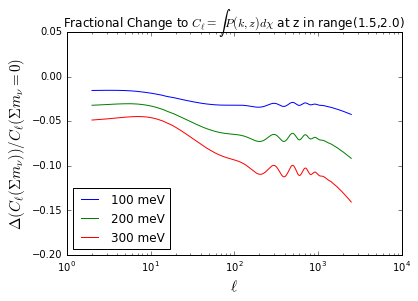

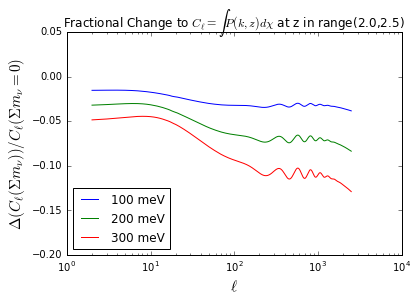

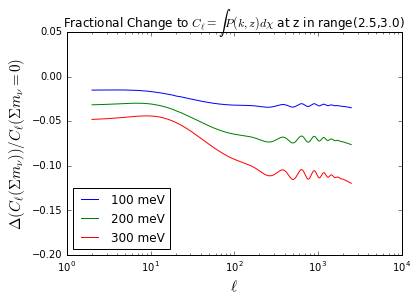

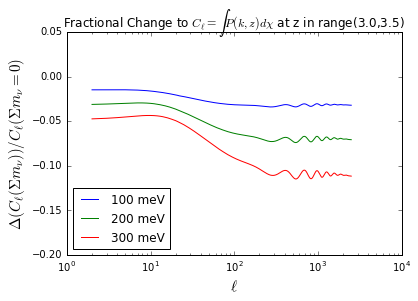

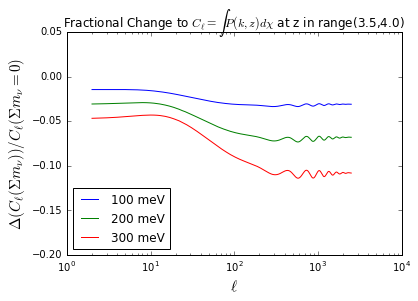

In [126]:
ClSs = [ClsS1,ClsS2,ClsS3]
"""
f, axarr = plt.subplots(nBins,1,figsize=(10,20))
doRatios=True
for binNum in range(nBins):
    plt.sca(axarr[binNum])
    if not doRatios:
        plt.semilogx(ls0,ClsS0[binNum],label='0 meV')
    for massNum in range(3):
        if doRatios:
            #print massNum,binNum
            plt.semilogx(ls0,(ClSs[massNum][binNum]-ClsS0[binNum])/ClsS0[binNum],label=labels[massNum])
            plt.ylim([-0.2,0.05])
        else:
            plt.semilogx(ls0,ClSs[massNum][binNum],label=labels[massNum])
            plt.ylim([0,12.5e-7])

f.subplots_adjust(hspace=0)
plt.show();
"""

%matplotlib inline
for binNum in range(nBins):
    
    for massNum in range(3):
        #print massNum,binNum
        plt.semilogx(ls0,(ClSs[massNum][binNum]-ClsS0[binNum])/ClsS0[binNum],label=labels[massNum])
        plt.ylim([-0.2,0.05])
    plt.ylabel(r'$\Delta(C_\ell(\Sigma m_\nu))/C_\ell(\Sigma m_\nu = 0) $',fontsize=15)
    plt.xlabel(r'$\ell$',fontsize=15)
    zmin = str(binEdges[binNum])
    zmax = str(binEdges[binNum+1])
    plt.title(r'Fractional Change to $C_\ell = \int P(k,z) d\chi$ at z in range('+zmin+','+zmax+')')
    plt.legend(loc='lower left')
    plt.show();

This simple integral over the power spectrum is showing the same unexpected behavior as the projected galaxy power spectra, above.

# Look at the matter power spectrum at the centers and edges of the bins

In [8]:
# look at the matter power spectrum at the centers and edges of the bins
zsForPzk = np.linspace(0,4,17)
print zsForPzk

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.  ]


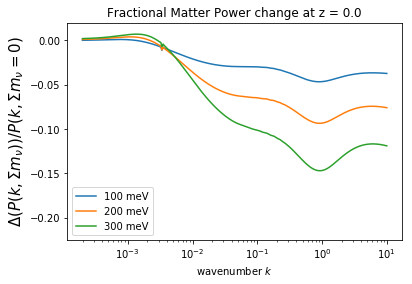

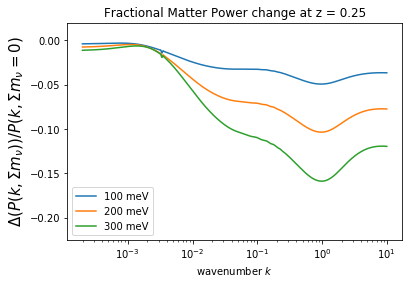

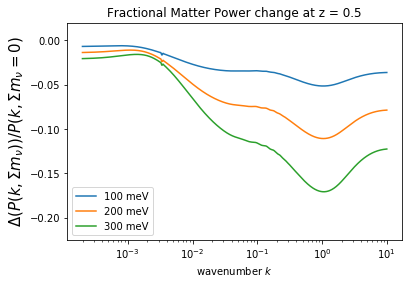

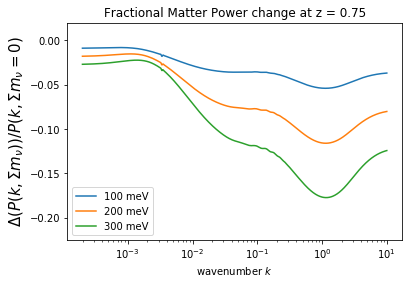

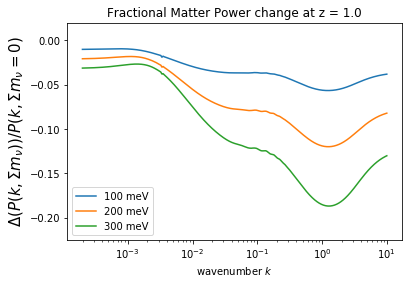

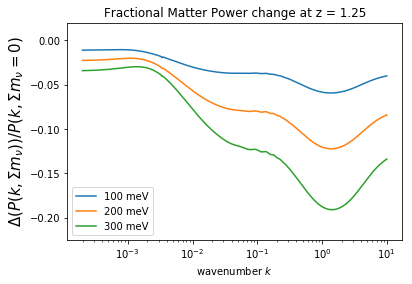

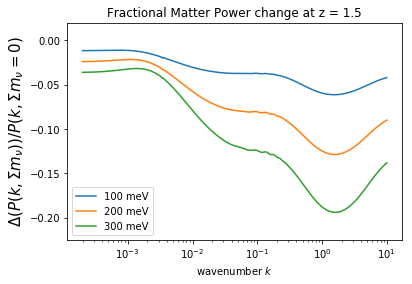

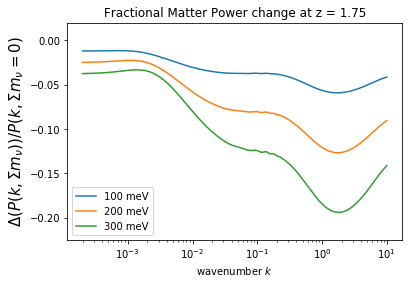

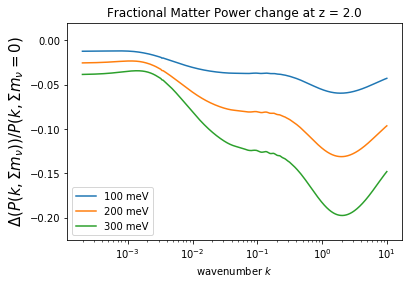

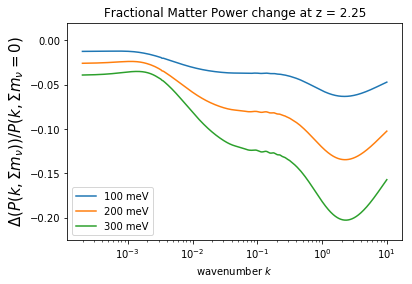

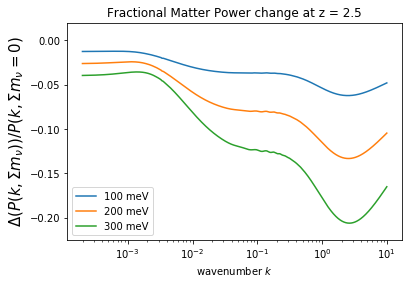

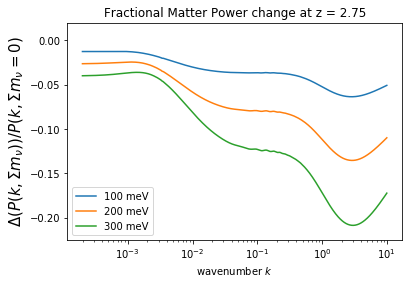

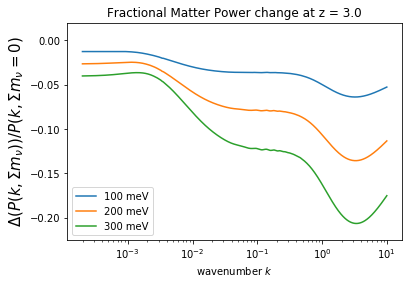

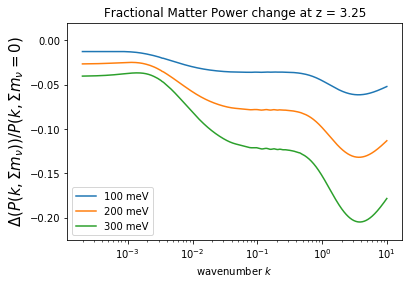

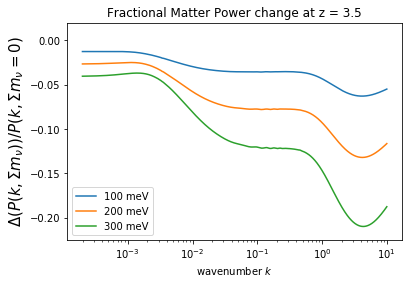

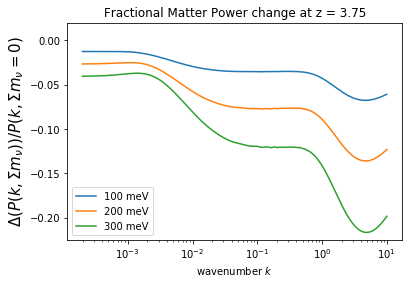

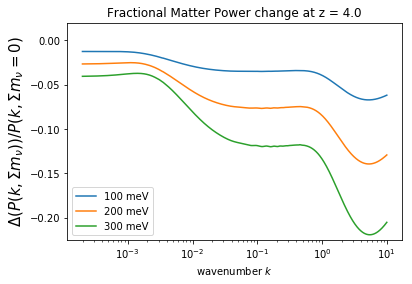

In [10]:
%matplotlib inline
for myZ in zsForPzk:
    #print 'starting redshift z = ',myZ
    Pk0 = PKinterp0.P(myZ,kSpectrum)
    Pk1 = PKinterp1.P(myZ,kSpectrum)
    Pk2 = PKinterp2.P(myZ,kSpectrum)
    Pk3 = PKinterp3.P(myZ,kSpectrum)
    Pks = (Pk1,Pk2,Pk3)
    for pkNum in range(3):
        t = (Pks[pkNum]-Pk0)/Pk0
        plt.semilogx(kSpectrum,t,label=labels[pkNum])
    plt.ylabel(r'$\Delta(P(k,\Sigma m_\nu))/P(k,\Sigma m_\nu = 0) $',fontsize=15)
    plt.xlabel(r'wavenumber $k$')
    plt.title('Fractional Matter Power change at z = '+str(myZ))
    plt.legend(loc='lower left')
    plt.ylim([-0.225,0.02])
    plt.show();

# Identify which part of $P(k,z,\Sigma m_\nu)$ goes into each point on the $C_\ell$ plot.

Use relation $k = \frac{\ell+0.5}{\chi}$

Start by using two $\ell$ values: $\ell_1 = 10, \ell_2 = 100$

In [129]:
# select redshift bin and ell values
# 8 redshift bins defined above
binNum = 7
ell1 = 10
ell2 = 100
# locate edges
print 'z_min = ',binEdges[binNum]
print 'z_max = ',binEdges[binNum+1]

z_min =  3.5
z_max =  4.0


In [130]:
# get \chi(z)
print 'bin edges: z = ',binEdges
chi0edges = chi0(binEdges)
chi1edges = chi1(binEdges)
chi2edges = chi2(binEdges)
chi3edges = chi3(binEdges)
#print 'bin edges in chi(Sigma m_nu):'
#print 'mnu0,chi0edges: ',mnu0,chi0edges
#print 'mnu1,chi1edges: ',mnu1,chi1edges
#print 'mnu2,chi2edges: ',mnu2,chi2edges
#print 'mnu3,chi3edges: ',mnu3,chi3edges

# look at bin for selected binNum
chi0edges = np.array(chi0edges[binNum:binNum+2])
chi1edges = np.array(chi1edges[binNum:binNum+2])
chi2edges = np.array(chi2edges[binNum:binNum+2])
chi3edges = np.array(chi3edges[binNum:binNum+2])

print 'bin edges in chi(Sigma m_nu):'
print 'mnu0,chi0edges: ',mnu0,chi0edges
print 'mnu1,chi1edges: ',mnu1,chi1edges
print 'mnu2,chi2edges: ',mnu2,chi2edges
print 'mnu3,chi3edges: ',mnu3,chi3edges


# k as a function of l, chi
def kNum(ell,chi):
    return (ell+0.5)/chi
# get kmin, kmax for both test ell values for each Sigma m_nu
k0edgesAtEll1 = kNum(ell1,chi0edges)
k0edgesAtEll2 = kNum(ell2,chi0edges)
k1edgesAtEll1 = kNum(ell1,chi1edges)
k1edgesAtEll2 = kNum(ell2,chi1edges)
k2edgesAtEll1 = kNum(ell1,chi2edges)
k2edgesAtEll2 = kNum(ell2,chi2edges)
k3edgesAtEll1 = kNum(ell1,chi3edges)
k3edgesAtEll2 = kNum(ell2,chi3edges)

print 'k edges:'
print k0edgesAtEll1
print k0edgesAtEll2
print k1edgesAtEll1
print k1edgesAtEll2
print k2edgesAtEll1
print k2edgesAtEll2
print k3edgesAtEll1
print k3edgesAtEll2

k0edges = [k0edgesAtEll1,k0edgesAtEll2]
k1edges = [k1edgesAtEll1,k1edgesAtEll2]
k2edges = [k2edgesAtEll1,k2edgesAtEll2]
k3edges = [k3edgesAtEll1,k3edgesAtEll2]

kedges = [k1edges,k2edges,k3edges]
#print kedges

bin edges: z =  [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4. ]
bin edges in chi(Sigma m_nu):
mnu0,chi0edges:  0.0 [ 6949.87674107  7330.27171534]
mnu1,chi1edges:  0.1 [ 6965.72867716  7344.97258684]
mnu2,chi2edges:  0.2 [ 6984.92447701  7362.95029495]
mnu3,chi3edges:  0.3 [ 7004.0599512   7380.85842325]
k edges:
[ 0.00151082  0.00143242]
[ 0.01446069  0.01371027]
[ 0.00150738  0.00142955]
[ 0.01442778  0.01368283]
[ 0.00150324  0.00142606]
[ 0.01438813  0.01364942]
[ 0.00149913  0.0014226 ]
[ 0.01434882  0.0136163 ]


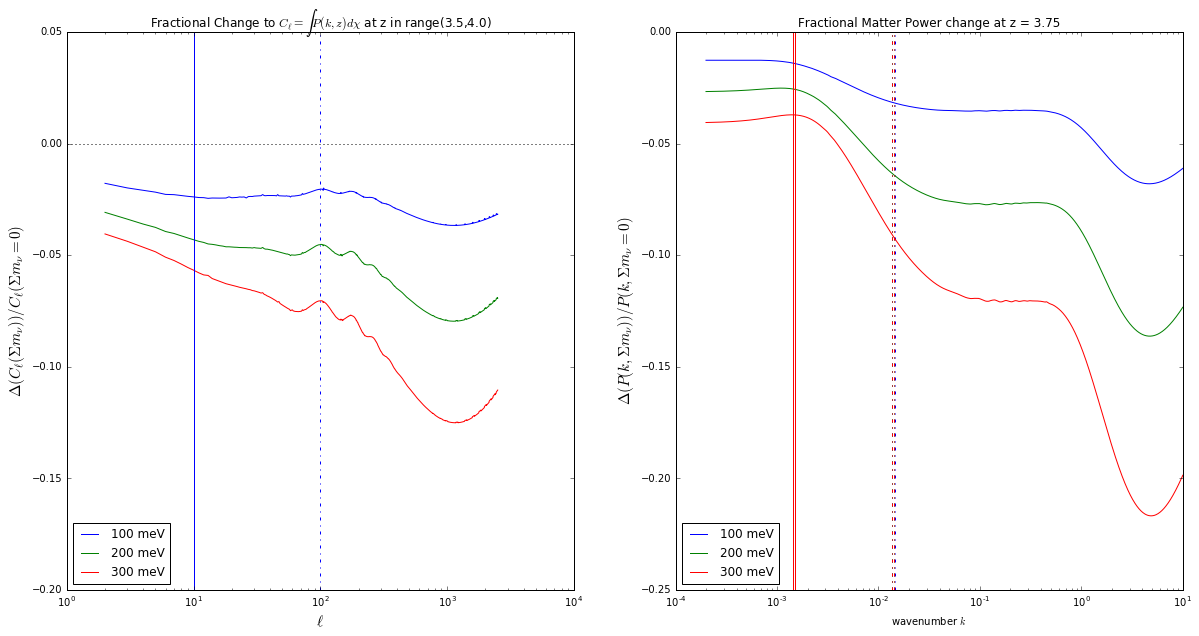

In [131]:
#delta P(k) at bin center: z= 2.25

f, axarr = plt.subplots(1,2,figsize=(20,10))

plt.sca(axarr[1])

colors = ['b','g','r']
myZ = (binEdges[binNum]+binEdges[binNum+1])/2 #2.25
Pk0 = PKinterp0.P(myZ,kSpectrum)
Pk1 = PKinterp1.P(myZ,kSpectrum)
Pk2 = PKinterp2.P(myZ,kSpectrum)
Pk3 = PKinterp3.P(myZ,kSpectrum)
Pks = (Pk1,Pk2,Pk3)
for pkNum in range(3):
    t = (Pks[pkNum]-Pk0)/Pk0
    plt.semilogx(kSpectrum,t,label=labels[pkNum],color=colors[pkNum])
    plt.axvline(x=kedges[pkNum][0][0] ,color=colors[pkNum],linestyle='-') # ell1, low k
    plt.axvline(x=kedges[pkNum][0][1] ,color=colors[pkNum],linestyle='-') # ell1, high k
    plt.axvline(x=kedges[pkNum][1][0] ,color=colors[pkNum],linestyle='-.')# ell2, low k
    plt.axvline(x=kedges[pkNum][1][1] ,color=colors[pkNum],linestyle='-.')# ell2, high k
plt.axhline(y=0,linestyle=':',color='k')
plt.ylabel(r'$\Delta(P(k,\Sigma m_\nu))/P(k,\Sigma m_\nu = 0) $',fontsize=15)
plt.xlabel(r'wavenumber $k$')
plt.title('Fractional Matter Power change at z = '+str(myZ))
plt.legend(loc='lower left')
#plt.show();

plt.sca(axarr[0])

binNum = 0 # kludge for when there is only one bin in ClSs
for massNum in range(3):
    plt.semilogx(ls0,(ClSs[massNum][binNum]-ClsS0[binNum])/ClsS0[binNum],label=labels[massNum])
    plt.ylim([-0.2,0.05])
    
plt.axvline(ell1,linestyle='-')
plt.axvline(ell2,linestyle='-.')
plt.ylabel(r'$\Delta(C_\ell(\Sigma m_\nu))/C_\ell(\Sigma m_\nu = 0) $',fontsize=15)
plt.xlabel(r'$\ell$',fontsize=15)

binNum=7 #remove kludge for accurate labeling
zmin = str(binEdges[binNum])
zmax = str(binEdges[binNum+1])
plt.axhline(y=0,linestyle=':',color='k')
plt.title(r'Fractional Change to $C_\ell = \int P(k,z) d\chi$ at z in range('+zmin+','+zmax+')')
plt.legend(loc='lower left')
plt.show();
